# Test for ABC with summeries across multiple loci

## Simulation and ABC Method

I simulated 22 "chromosomes", where "chromosome" is the 100 times smaller than the human chromosome size. For example, we simulated "chromosome 1" with a length of 2491634.
I simulated a model with 3 populations (A, B, C), where populations A and B diverge at time AB_t, A and C diverge at time AC_t, and A changes in population size at time AN_t. I used the uniform priors of
```
A = (10^4.0:10^5.0)
B = (10^3.0:10^6.7)
C = (10^4.0:10^6.7)
AB_t = (1600:4100)
AC_t = (1600:4100)
AN_t = (0:4100)
AN = (10^3.0:10^4.0)
```
I used the following workflow:
1. I simulated each chromosome 99,693 times with the same parameter values for a "whole genome".
2. Randomly pick "observed" parameter values from simulations.
3. Summed the statistics across the chromosomes:
    - "Count" statistics, $x$, (number of segregating sites, number of singletons, number of doubletons)
    $$\sum_1^{22} x_i$$
    - "relative" statistics, $y$, ($\pi$, Tajima's D, $F_{ST}$) weighted by chromosome length, $\ell$
    $$\sum_1^{22}y_i\left(\dfrac{\ell_i}{\sum_1^{22}\ell_j} \right)$$
3. Transform genome statistics to PLS components.
4. Perform ABC to approximate marginal posterior densities for each parameter, and joint posterior for the effective population size of B and C.
   - 100 retained simulations for truncated prior
   - 100 points for the marginal posterior densities
   - Dirac peak of 0.01.

## Assessment of ABC results

In [1]:
import pandas as pd
from ggplot import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/agladstein/.local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/agladstein/.local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Combine results into one dataframe

In [2]:
def create_combined_df(file_name):
    combined_df = pd.read_csv(file_name, sep='\t')
    combined_df['obs_str'] = combined_df['obs'].astype(str)
    return combined_df

In [4]:
results_path = '/vol_c/ABC_test_genome'
combined_PosteriorCharacteristics_observed_name = '{}/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorCharacteristics_combined.txt'.format(results_path)
combined_PosteriorDensities_name = '{}/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorDensities_Obs0_combined.txt'.format(results_path)

obs_list = list(range(1, 101))

if os.path.isfile(combined_PosteriorCharacteristics_observed_name) and os.path.isfile(combined_PosteriorDensities_name):
    combined_PosteriorCharacteristics_observed_df = create_combined_df(combined_PosteriorCharacteristics_observed_name)
    combined_PosteriorDensities_df = create_combined_df(combined_PosteriorDensities_name)                            
else:
    print('{} or {} does not exist')
    exit()
parameters = list(combined_PosteriorCharacteristics_observed_df)[0:7]

In [5]:
combined_PosteriorCharacteristics_observed_df.head()

,A,B,C,AN,AB_t,AC_t,AN_t,A_mode,A_mean,A_median,...,AN_t_HDI50_upper,AN_t_HDI90_lower,AN_t_HDI90_upper,AN_t_HDI95_lower,AN_t_HDI95_upper,AN_t_HDI99_lower,AN_t_HDI99_upper,B_C_prob,obs,obs_str
0,34239.885378,3.293939e+06,8.923739e+05,3588.048402,3726.708550,3087.386232,1641.263665,42726.4,48544.9,47764.9,...,1842.690,1398.970,2008.570,1365.290,2091.40,1263.130,2213.560,0.453775,1,1
1,59235.520630,3.147808e+06,4.649182e+06,4557.304844,3082.089948,3621.520245,401.551711,62725.7,58089.9,60183.0,...,502.327,230.192,600.507,227.784,669.29,150.254,724.748,0.348176,2,2
2,34578.797288,4.332707e+06,3.482190e+06,5614.120636,2896.577792,3112.557639,3683.171137,30908.7,32065.4,31660.9,...,3872.180,3419.120,4037.840,3362.600,4079.25,3224.870,4099.960,0.611048,3,3
3,62443.766715,4.555841e+06,2.436130e+06,5082.639096,1897.679669,2613.641321,2987.637987,73634.4,74369.3,74317.1,...,2964.940,2670.020,3085.330,2629.780,3125.47,2546.950,3200.620,0.356510,4,4
4,30025.106158,1.489602e+05,8.842184e+05,8088.530709,2335.484137,3336.211750,2400.112871,26363.4,35237.1,32538.3,...,2759.540,2036.070,2961.080,1952.240,3043.91,1760.090,3162.920,0.344913,5,5


In [6]:
combined_PosteriorDensities_df.head()

,number,A,density,B,density.1,C,density.2,AN,density.3,AB_t,density.4,AC_t,density.5,AN_t,density.6,obs,obs_str
0,1,10000.4,0.000003,1089.52,7.817960e-08,10199.0,1.482920e-07,1000.36,4.164290e-128,1600.03,5.928788e-323,1600.02,1.693520e-131,0.008756,3.890310e-26,1,1
1,2,10909.5,0.000004,51703.50,8.749500e-08,60711.1,1.628130e-07,1091.26,3.869400e-119,1625.28,2.725640e-315,1625.27,4.790600e-127,41.422400,5.702030e-25,1,1
2,3,11818.5,0.000004,102317.00,9.717810e-08,111223.0,1.775390e-07,1182.17,1.656400e-110,1650.53,9.803480e-308,1650.52,1.129190e-122,82.836100,7.745380e-24,1,1
3,4,12727.6,0.000005,152931.00,1.071450e-07,161735.0,1.923100e-07,1273.07,3.267630e-102,1675.79,2.847430e-300,1675.78,2.217900e-118,124.250000,9.751330e-23,1,1
4,5,13636.6,0.000005,203545.00,1.173080e-07,212248.0,2.069560e-07,1363.98,2.971640e-94,1701.04,6.678610e-293,1701.03,3.630240e-114,165.663000,1.137990e-21,1,1


Functions to calculate things

In [7]:
def calc_estimate_dist(param, combined_PosteriorCharacteristics_observed_df):
    estimate = '{}_mode'.format(param)
    estimate_dist_name = '{}_estimate_dist'.format(param)
    combined_PosteriorCharacteristics_observed_df[estimate_dist_name] = (combined_PosteriorCharacteristics_observed_df[estimate] - combined_PosteriorCharacteristics_observed_df[param])**2
    combined_PosteriorCharacteristics_observed_df.head()
    return combined_PosteriorCharacteristics_observed_df


def calc_HPDI_dist(param, combined_PosteriorCharacteristics_observed_df):
    HDI95_upper_name = '{}_HDI95_upper'.format(param)
    HDI95_lower_name = '{}_HDI95_lower'.format(param)
    HPDI_dist_name = '{}_HPDI_dist'.format(param)
    HDI95_upper = combined_PosteriorCharacteristics_observed_df[HDI95_upper_name]
    HDI95_lower = combined_PosteriorCharacteristics_observed_df[HDI95_lower_name]
    true = combined_PosteriorCharacteristics_observed_df[param]
    
    combined_PosteriorCharacteristics_observed_df[HPDI_dist_name] = np.where((true < HDI95_lower) & (true > HDI95_upper), ((true - HDI95_lower)**2 + (true - HDI95_upper)**2)*(-1), (true - HDI95_lower)**2 + (true - HDI95_upper)**2)    
    return combined_PosteriorCharacteristics_observed_df


def calc_estimate_ratio(param, combined_PosteriorCharacteristics_observed_df):
    ratio_name = '{}_estimate_ratio'.format(param)
    estimate = '{}_mode'.format(param)
    combined_PosteriorCharacteristics_observed_df[ratio_name] = combined_PosteriorCharacteristics_observed_df[estimate]/combined_PosteriorCharacteristics_observed_df[param]
    return combined_PosteriorCharacteristics_observed_df


def calc_HPDI_ratio(param, combined_PosteriorCharacteristics_observed_df):
    ratio_upper_name = '{}_HPDI95_upper_ratio'.format(param)
    ratio_lower_name = '{}_HPDI95_lower_ratio'.format(param)
    dist_ratio_name = '{}_HPDI95_dist_ratio'.format(param)
    HDI95_upper_name = '{}_HDI95_upper'.format(param)
    HDI95_lower_name = '{}_HDI95_lower'.format(param)
    combined_PosteriorCharacteristics_observed_df[ratio_upper_name] = combined_PosteriorCharacteristics_observed_df[HDI95_upper_name]/combined_PosteriorCharacteristics_observed_df[param]
    combined_PosteriorCharacteristics_observed_df[ratio_lower_name] = combined_PosteriorCharacteristics_observed_df[HDI95_lower_name]/combined_PosteriorCharacteristics_observed_df[param]
    combined_PosteriorCharacteristics_observed_df[dist_ratio_name] = combined_PosteriorCharacteristics_observed_df[ratio_upper_name] - combined_PosteriorCharacteristics_observed_df[ratio_lower_name]
    return combined_PosteriorCharacteristics_observed_df

In [8]:
combined_PosteriorCharacteristics_observed_df['B-C'] = combined_PosteriorCharacteristics_observed_df['B'] - combined_PosteriorCharacteristics_observed_df['C']
for param in parameters:
    combined_PosteriorCharacteristics_observed_df = calc_estimate_dist(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_HPDI_dist(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_estimate_ratio(param, combined_PosteriorCharacteristics_observed_df)
    combined_PosteriorCharacteristics_observed_df = calc_HPDI_ratio(param, combined_PosteriorCharacteristics_observed_df)
combined_PosteriorCharacteristics_observed_df.head()

,A,B,C,AN,AB_t,AC_t,AN_t,A_mode,A_mean,A_median,...,AC_t_estimate_ratio,AC_t_HPDI95_upper_ratio,AC_t_HPDI95_lower_ratio,AC_t_HPDI95_dist_ratio,AN_t_estimate_dist,AN_t_HPDI_dist,AN_t_estimate_ratio,AN_t_HPDI95_upper_ratio,AN_t_HPDI95_lower_ratio,AN_t_HPDI95_dist_ratio
0,34239.885378,3.293939e+06,8.923739e+05,3588.048402,3726.708550,3087.386232,1641.263665,42726.4,48544.9,47764.9,...,1.000814,1.045800,0.959653,0.086147,3215.608445,278784.183910,1.034550,1.274262,0.831853,0.442409
1,59235.520630,3.147808e+06,4.649182e+06,4557.304844,3082.089948,3621.520245,401.551711,62725.7,58089.9,60183.0,...,1.020552,1.057561,0.982204,0.075358,158.590935,101879.008837,1.031362,1.666759,0.567259,1.099500
2,34578.797288,4.332707e+06,3.482190e+06,5614.120636,2896.577792,3112.557639,3683.171137,30908.7,32065.4,31660.9,...,0.960268,1.118472,0.644595,0.473877,7306.635982,259644.319560,1.023208,1.107537,0.912963,0.194574
3,62443.766715,4.555841e+06,2.436130e+06,5082.639096,1897.679669,2613.641321,2987.637987,73634.4,74369.3,74317.1,...,1.075943,1.302991,0.777310,0.525680,7863.785375,147060.002659,0.970318,1.046134,0.880220,0.165914
4,30025.106158,1.489602e+05,8.842184e+05,8088.530709,2335.484137,3336.211750,2400.112871,26363.4,35237.1,32538.3,...,1.032138,1.081337,0.977276,0.104061,43663.081940,615064.852055,1.087061,1.268236,0.813395,0.454841


### Parameter Estimates

#### Ratio of parameter estimate to true value
$E/T$

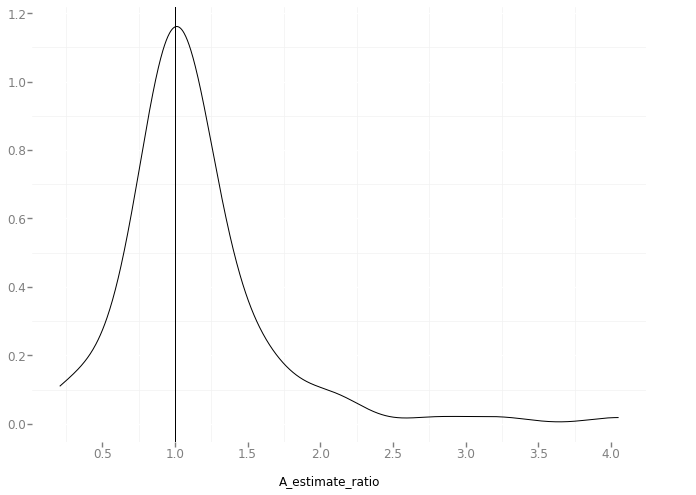

<ggplot: (8794670847275)>


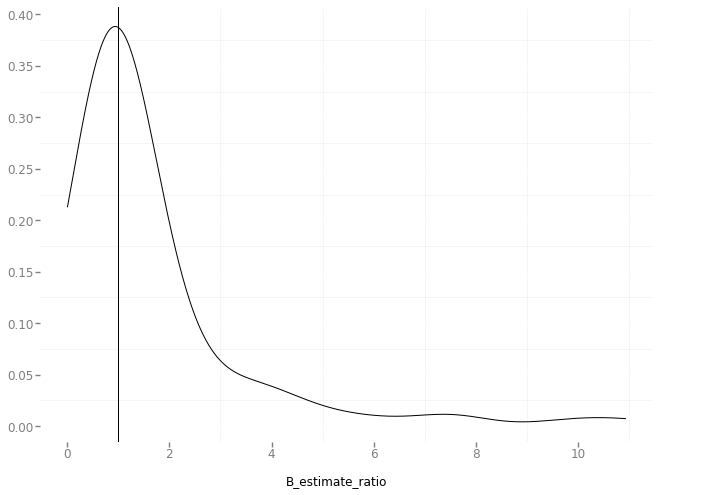

<ggplot: (8794660430926)>


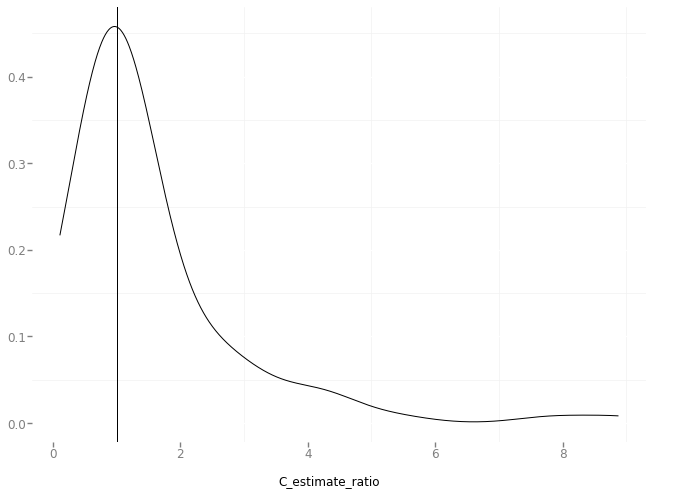

<ggplot: (-9223363242194381294)>


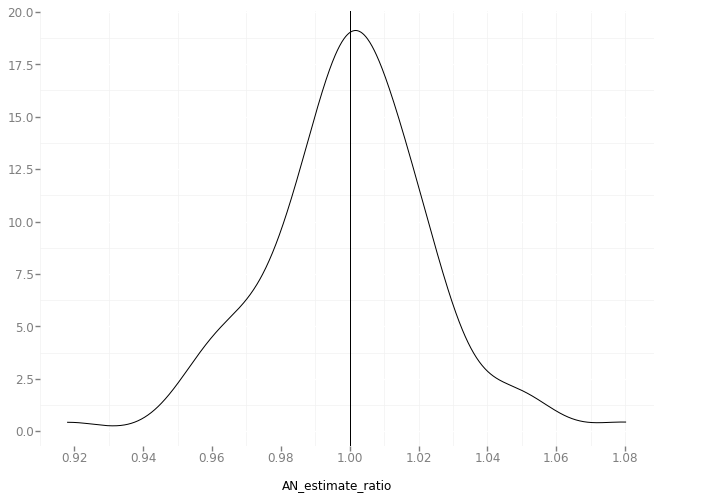

<ggplot: (8794660386403)>


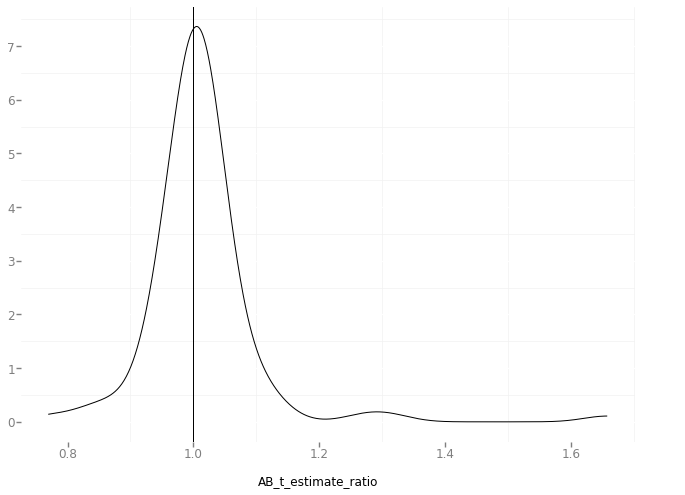

<ggplot: (-9223363242184120260)>


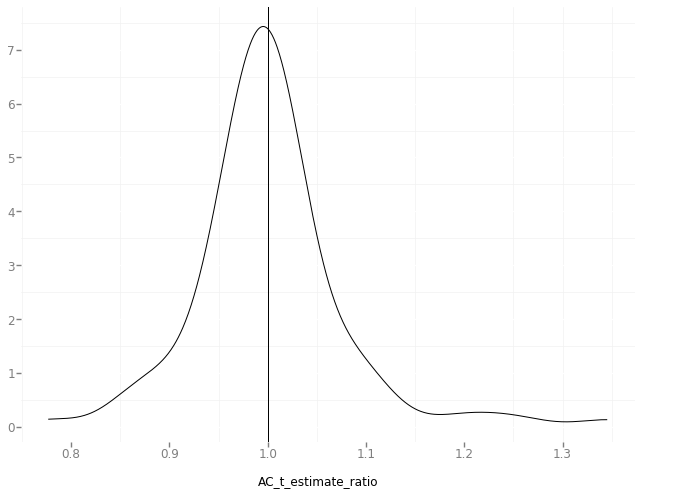

<ggplot: (8794660348904)>


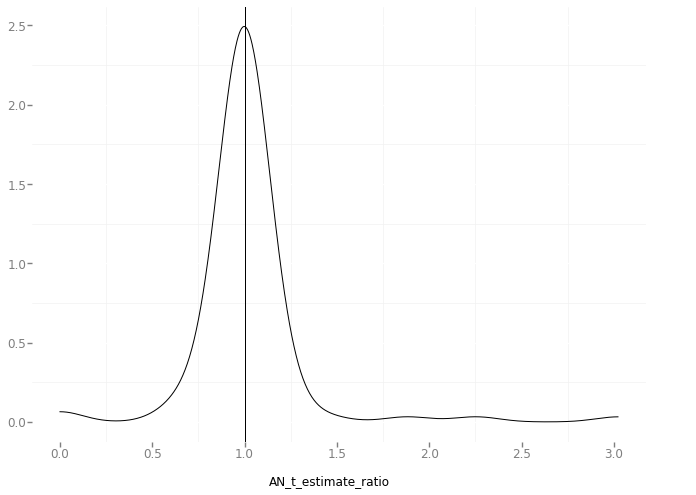

<ggplot: (-9223363242194403647)>


In [9]:
for param in parameters:
    estimate_ratio_name = '{}_estimate_ratio'.format(param)
    plot = ggplot(aes(x = estimate_ratio_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        geom_vline(x = 1) + \
        theme_bw()
    print(plot)

#### Squared difference of the parameter estimate from the observed value for each chromosome
$(T-E)^2$

Ideally, each successive chromosome should reduce the squared difference from the observed value

### HPDI_95

#### Ratio of parameter HPDI to true value
$\dfrac{HPDI}{T}$

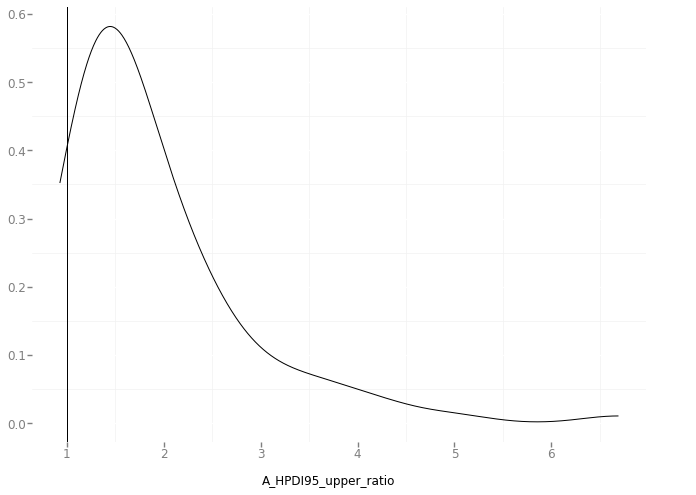

<ggplot: (8794670647507)>


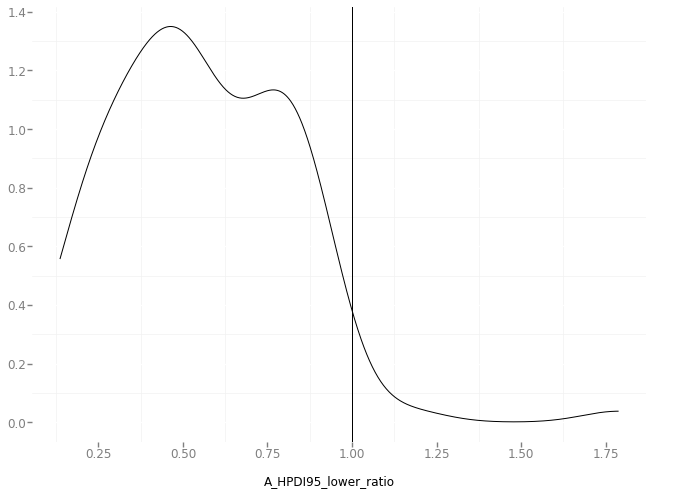

<ggplot: (8794660366582)>


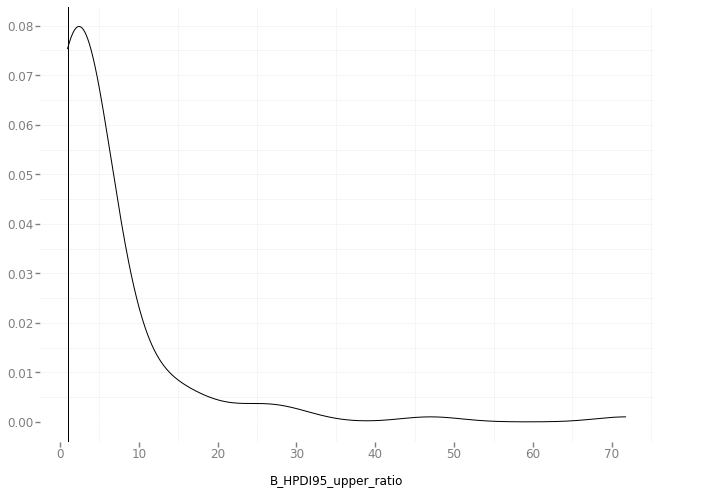

<ggplot: (8794660278655)>


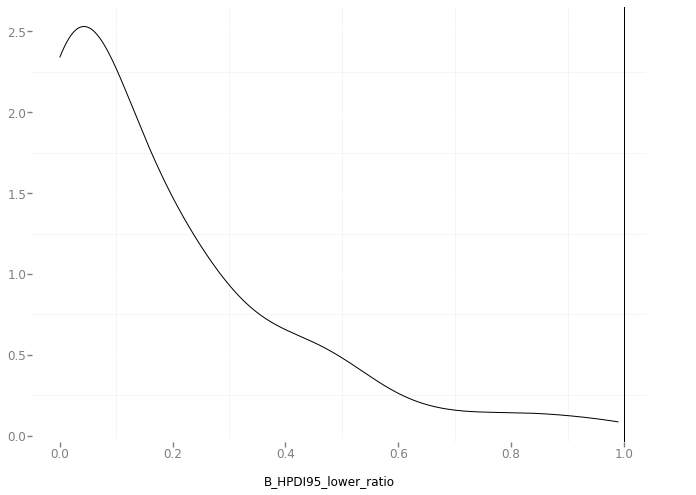

<ggplot: (8794660228451)>


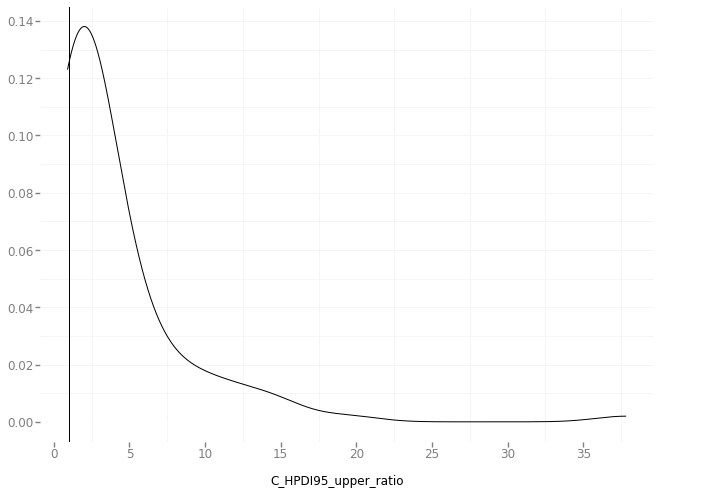

<ggplot: (-9223363242194562367)>


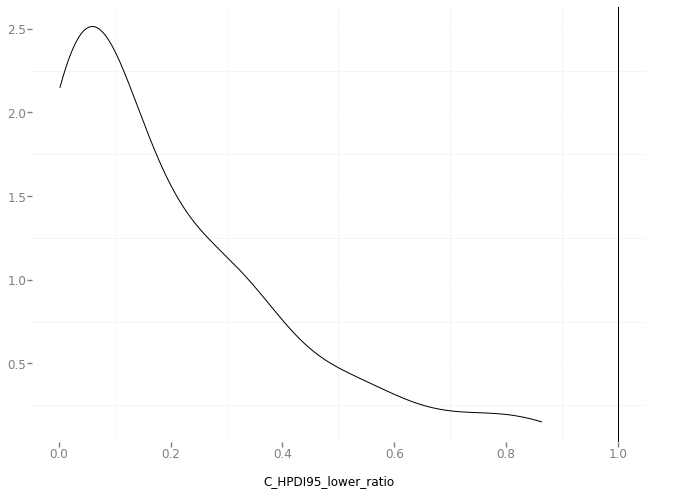

<ggplot: (-9223363242194592354)>


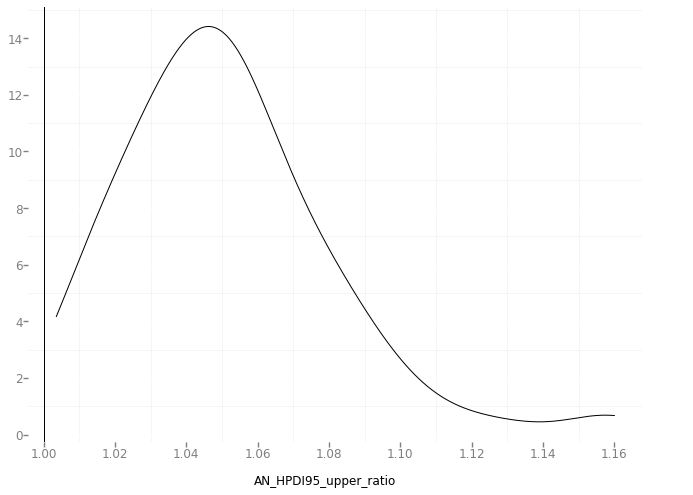

<ggplot: (-9223363242194634976)>


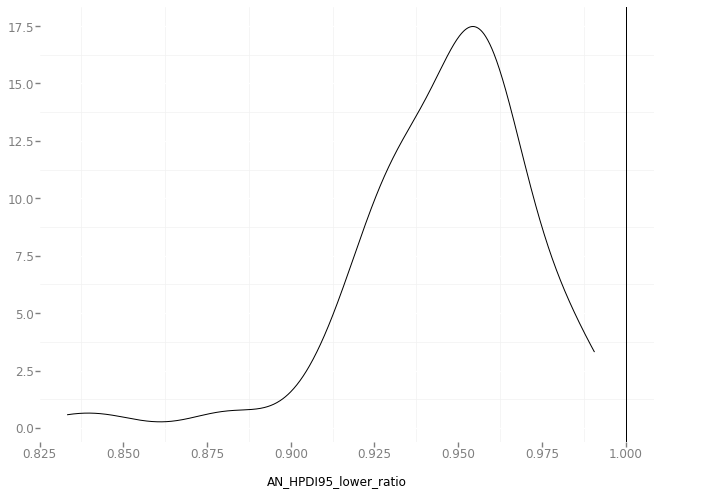

<ggplot: (-9223363242194714659)>


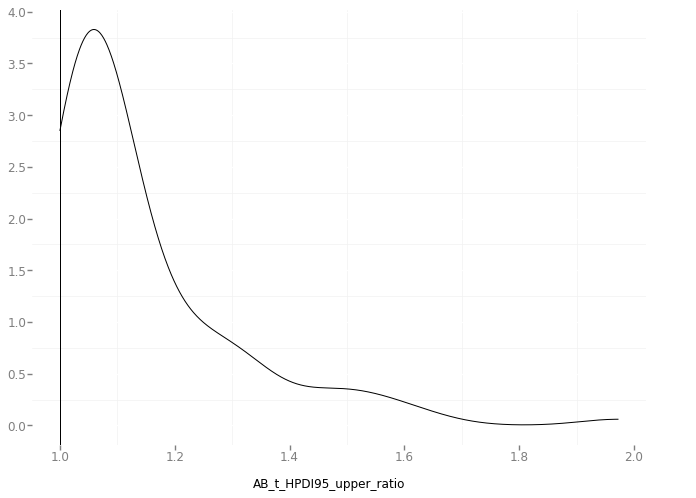

<ggplot: (8794660031110)>


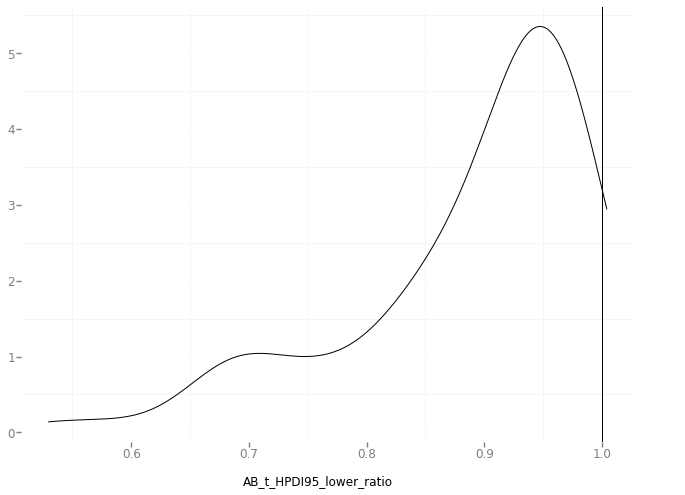

<ggplot: (8794660059540)>


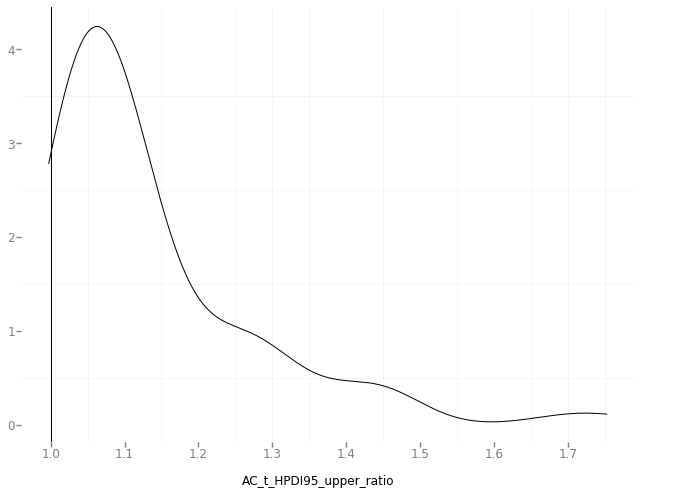

<ggplot: (-9223363242194634815)>


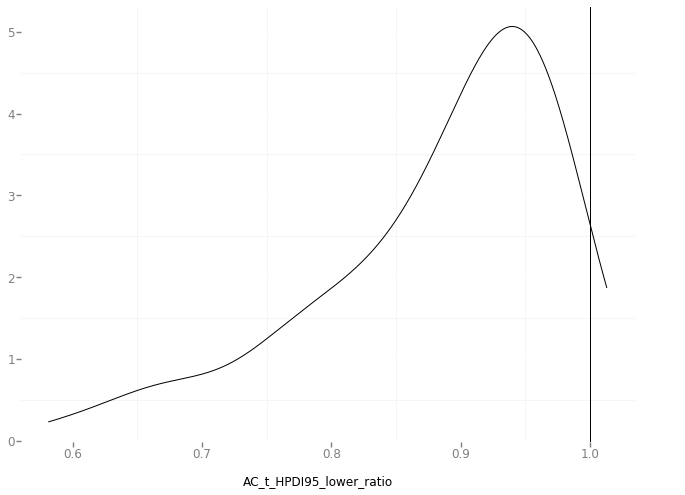

<ggplot: (-9223363242194646840)>


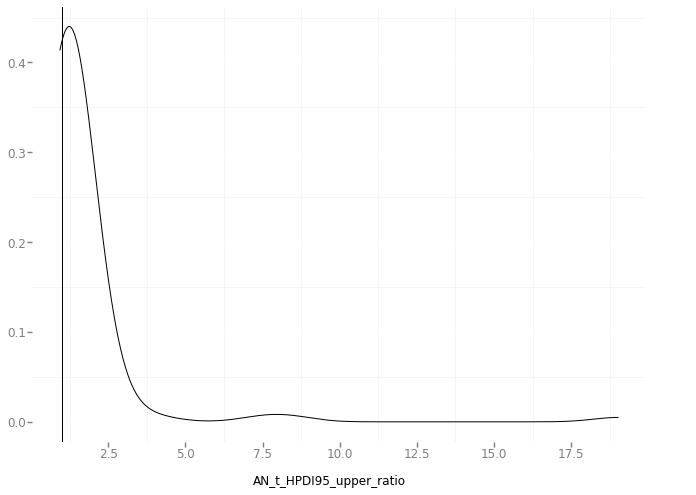

<ggplot: (8794660453149)>


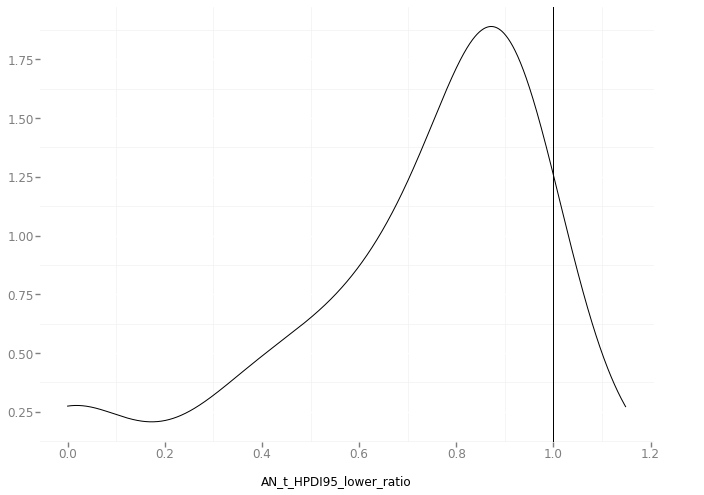

<ggplot: (-9223363242194324252)>


In [10]:
for param in parameters:
    estimate_HPDI_upper_name = '{}_HPDI95_upper_ratio'.format(param)
    plot = ggplot(aes(x = estimate_HPDI_upper_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        geom_vline(x = 1) + \
        theme_bw()
    print(plot)
    
    estimate_HPDI_lower_name = '{}_HPDI95_lower_ratio'.format(param)
    plot = ggplot(aes(x = estimate_HPDI_lower_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        geom_vline(x = 1) + \
        theme_bw()
    print(plot)

#### Distance between upper and lower ratios of parameter HPDI to true values
$\dfrac{HPDI_{U}}{T} - \dfrac{HPDI_{L}}{T}$

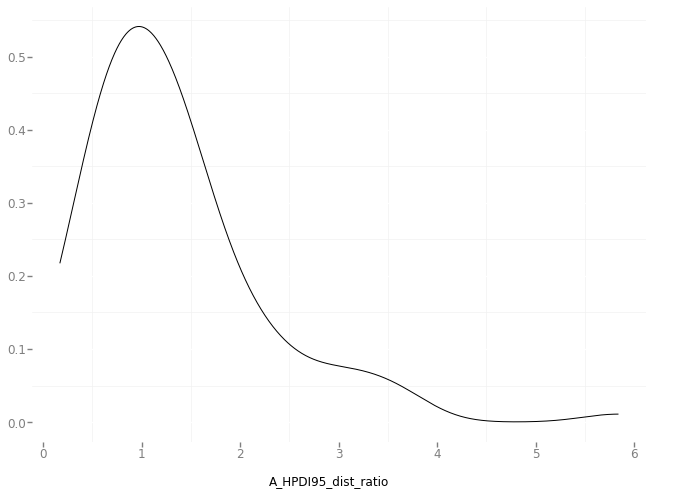

<ggplot: (-9223363242194360032)>


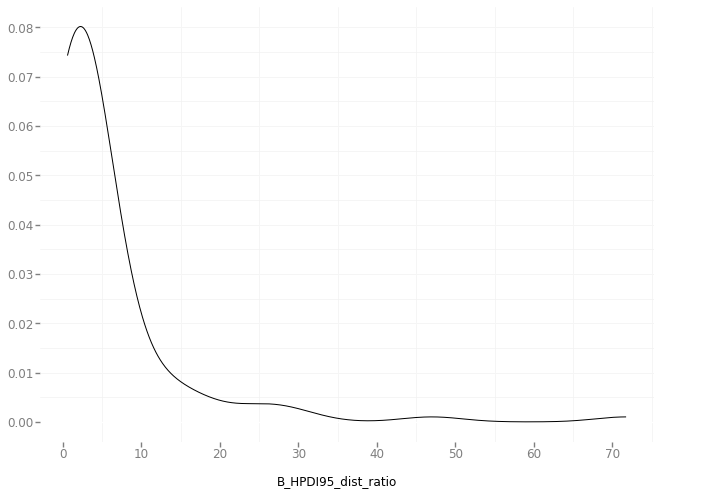

<ggplot: (-9223363242194641653)>


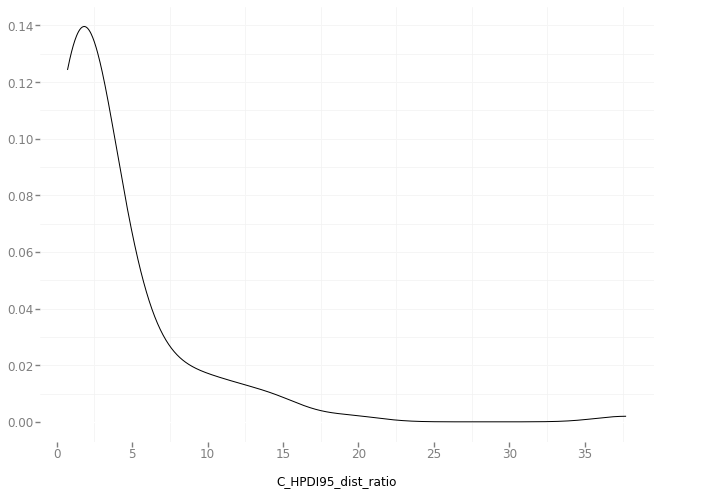

<ggplot: (8794660164293)>


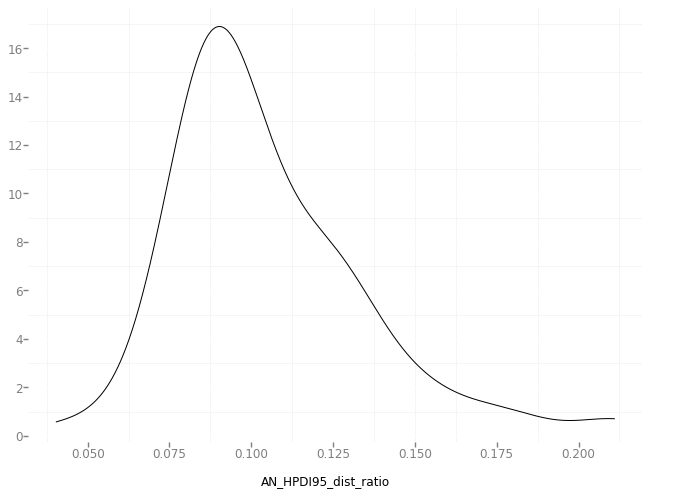

<ggplot: (-9223363242194638546)>


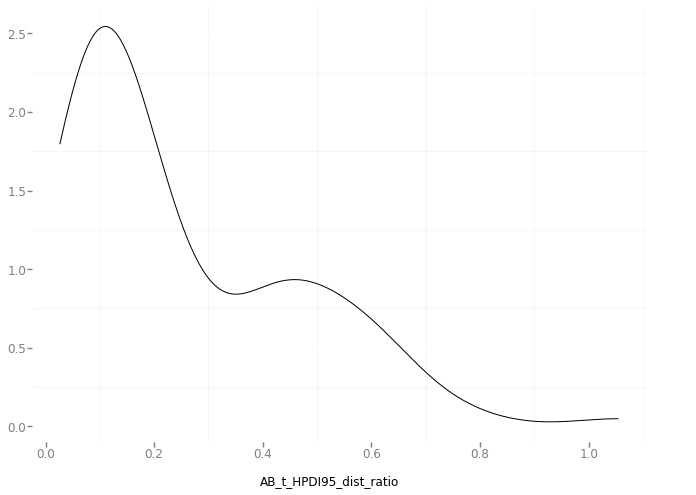

<ggplot: (8794660046561)>


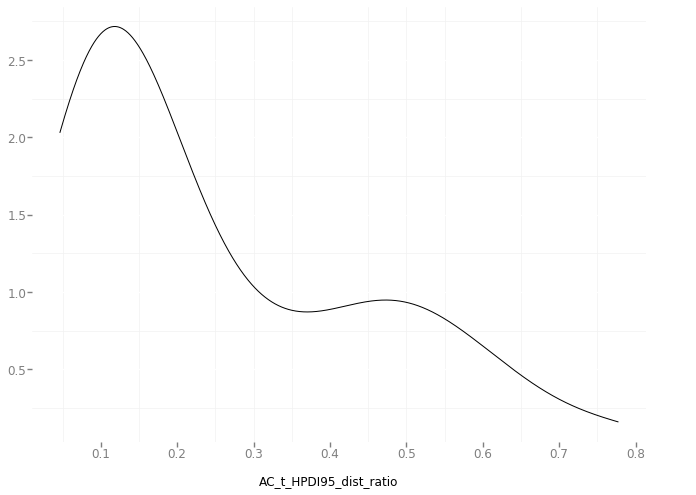

<ggplot: (8794660064481)>


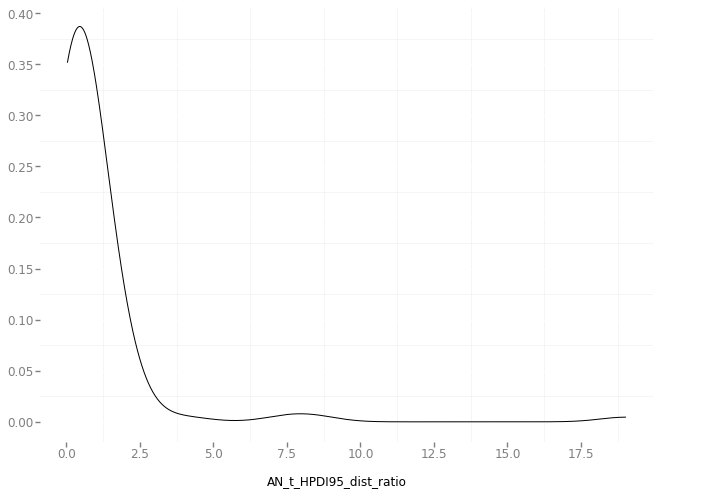

<ggplot: (8794660132577)>


In [13]:
for param in parameters:
    dist_ratio_name = '{}_HPDI95_dist_ratio'.format(param)
    plot = ggplot(aes(x = dist_ratio_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        theme_bw()
    print(plot)

### Power to detect $N_1 > N_2$

Distribution of true $B-C$

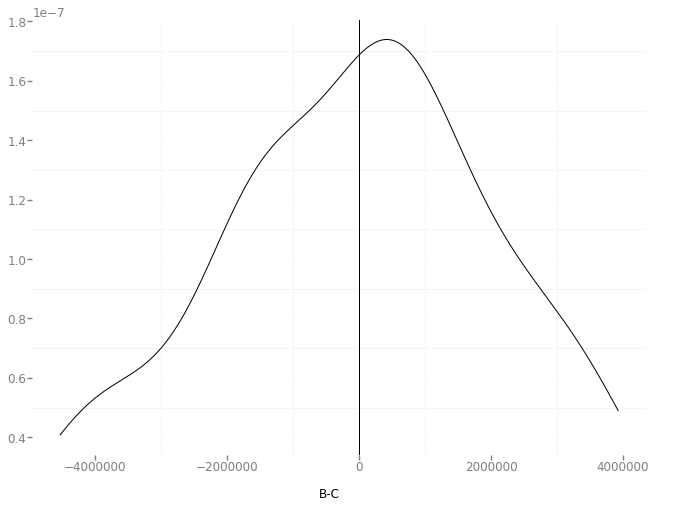

<ggplot: (8794660312335)>

In [14]:
ggplot(aes(x = 'B-C'), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_density() + \
        geom_vline(x=0) + \
        theme_bw()

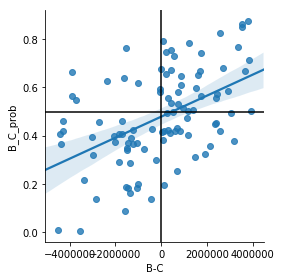

In [17]:
sns.lmplot(x="B-C", y="B_C_prob", data=combined_PosteriorCharacteristics_observed_df, size=4)
plt.axvline(0, color = 'black')
plt.axhline(0.5, color = 'black')

In [18]:
def calc_confusion_matrix(df, prob):
    confusion = {}
    act_B_ls_C = df['B-C'] < 0
    act_B_gr_C = df['B-C'] > 0
    pred_B_gr_C = df['B_C_prob'] > prob
    pred_B_ls_C = df['B_C_prob'] < prob
        
    confusion['act_B_ls_C_pred_B_gr_C'] = len(df[act_B_ls_C  & pred_B_gr_C])
    confusion['act_B_ls_C_pred_B_ls_C'] = len(df[act_B_ls_C  & pred_B_ls_C])
    confusion['act_B_gr_C_pred_B_gr_C'] = len(df[act_B_gr_C  & pred_B_gr_C])
    confusion['act_B_gr_C_pred_B_ls_C'] = len(df[act_B_gr_C  & pred_B_ls_C])   
    confusion['prob'] = str(prob)        
    return confusion


df_list = []
prob_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for prob in prob_list:
    confusion = calc_confusion_matrix(combined_PosteriorCharacteristics_observed_df, prob)
    df = pd.DataFrame(confusion, index = [0])
    df_list.append(df)
confusion_df = pd.concat(df_list)
confusion_df['correct'] = confusion_df['act_B_gr_C_pred_B_gr_C'] + confusion_df['act_B_ls_C_pred_B_ls_C']
confusion_df['incorrect'] = confusion_df['act_B_ls_C_pred_B_gr_C'] + confusion_df['act_B_gr_C_pred_B_ls_C']
confusion_df.head()

,act_B_gr_C_pred_B_gr_C,act_B_gr_C_pred_B_ls_C,act_B_ls_C_pred_B_gr_C,act_B_ls_C_pred_B_ls_C,prob,correct,incorrect
0,33,22,10,35,0.5,68,32
0,20,35,6,39,0.6,59,41
0,12,43,1,44,0.7,56,44
0,4,51,0,45,0.8,49,51
0,0,55,0,45,0.9,45,55


Distribution of probability B>C when B<C

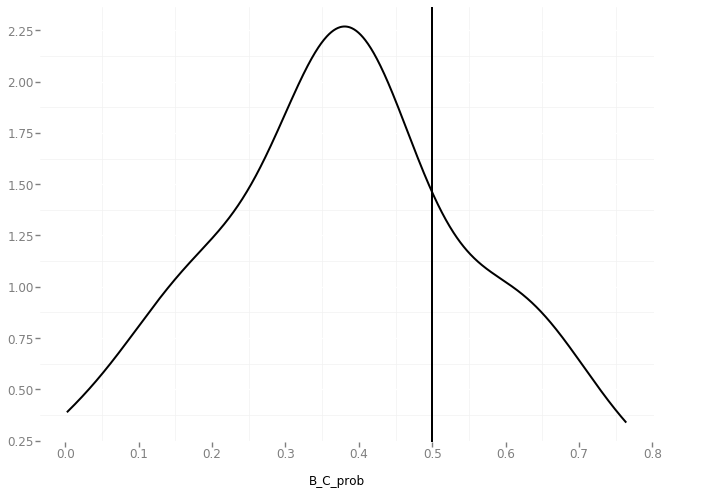

<ggplot: (-9223363242194755433)>

In [19]:
ggplot(aes(x = 'B_C_prob'), data = combined_PosteriorCharacteristics_observed_df[combined_PosteriorCharacteristics_observed_df['B-C'] < 0]) + \
        geom_density(size = 2) + \
        geom_vline(x=0.5, size = 2) + \
        theme_bw()

Distribution of probability B>C when B>C

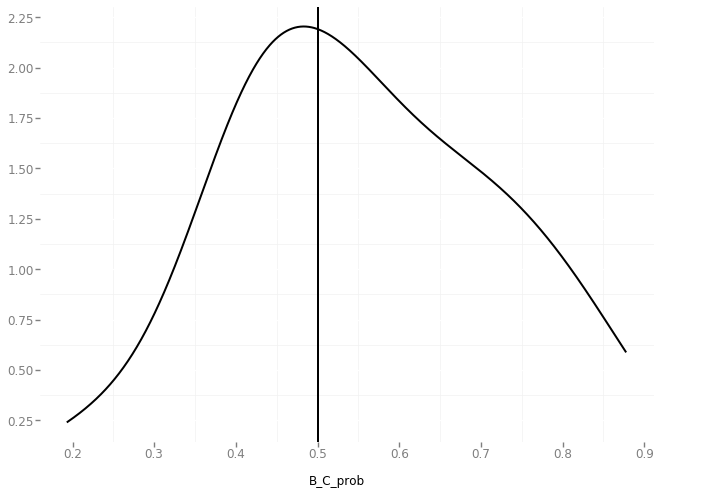

<ggplot: (-9223363242194440746)>

In [20]:
ggplot(aes(x = 'B_C_prob'), data = combined_PosteriorCharacteristics_observed_df[combined_PosteriorCharacteristics_observed_df['B-C'] > 0]) + \
        geom_density(size = 2) + \
        geom_vline(x=0.5, size = 2) + \
        theme_bw()